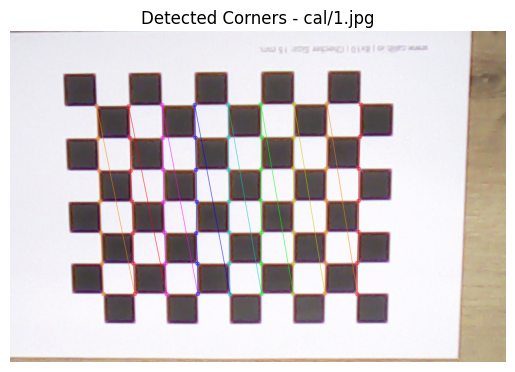

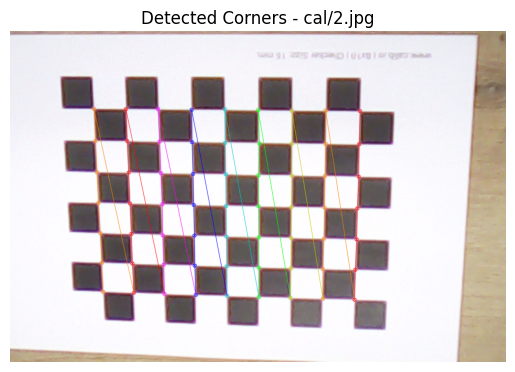

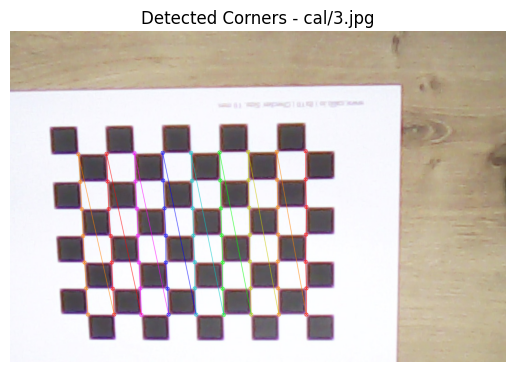

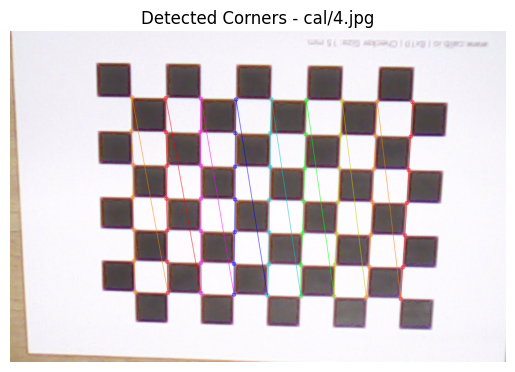

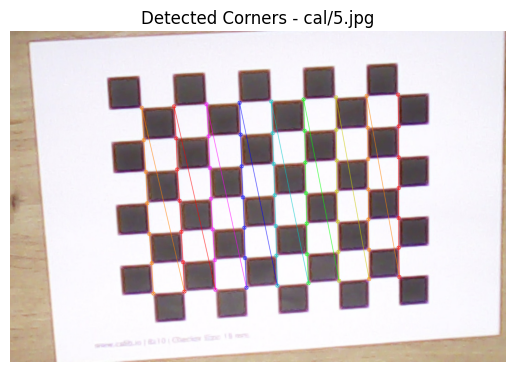

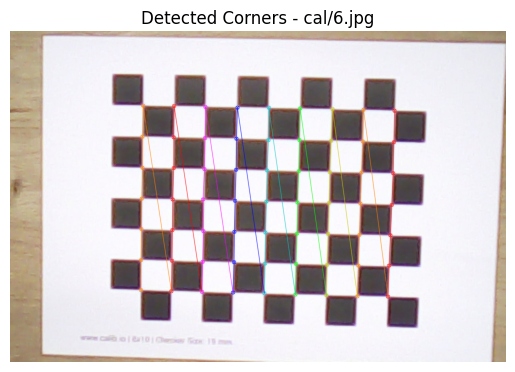

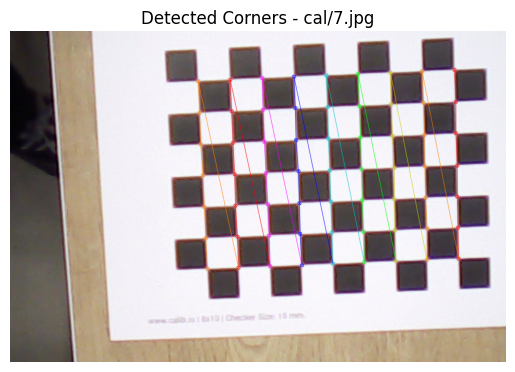

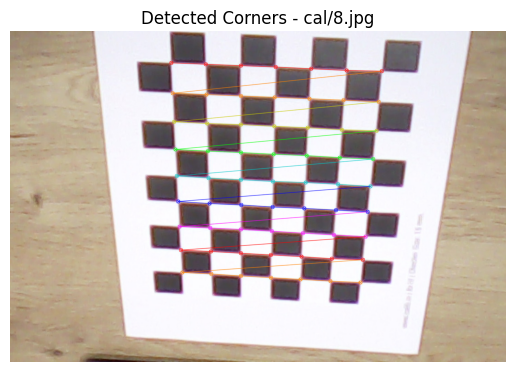

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define chessboard size (Adjust if necessary)
chessboard_size = (7, 9)  # (Columns, Rows) - Change if needed
square_size = 1.0  # Set to 1.0 if unknown

# Prepare object points (3D points of chessboard corners in real-world)
objp = np.zeros((chessboard_size[0] * chessboard_size[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1, 2) * square_size

# Lists to store 3D points (object points) and 2D points (image points)
objpoints = []  # Real-world points
imgpoints = []  # Image points (detected corners)

# List of calibration images (jpg format)
image_paths = ["cal/1.jpg","cal/2.jpg","cal/3.jpg","cal/4.jpg","cal/5.jpg","cal/6.jpg","cal/7.jpg","cal/8.jpg",]

# Read and process each calibration image
for img_path in image_paths:
    img = cv2.imread(img_path)   #Reads the image from the specified path
    
    if img is None:
        print(f"Error: Could not load {img_path}")
        continue
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    
    # Detect chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, chessboard_size, None) # Detects the corners of a chessboard pattern, 
    #gray: The grayscale input image.
    #chessboard_size: The number of inner corners per chessboard row and column.

    #Reutrns of the functions are as follows: 

    #ret: Boolean indicating success (True) or failure (False) in detecting the chessboard.
    #corners: Detected corner positions (if found).

    
    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, chessboard_size, corners, ret) # Draws detected chessboard corners on an image.
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # Displays an image using Matplotlib.
        plt.title(f"Detected Corners - {img_path}")
        plt.axis("off")
        plt.show()
    else:
        print(f"Chessboard not detected in {img_path}")


## Intrinsic Parameters

In [8]:
# Performed camera calibration
if len(objpoints) > 0 and len(imgpoints) > 0:
    ret, K, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None) #Computes the intrinsic parameters
    #(camera matrix K) and extrinsic parameters (rotation and translation vectors) of the camera. 

    #objpoints: 3D real-world coordinates of chessboard corners.
    #imgpoints: 2D image coordinates of detected corners.
    #gray.shape[::-1]: Image size in (width, height) format.
    #None, None: The initial guess for cameraMatrix and distCoeffs (optional).

    #ret: The RMS (Root Mean Square) re-projection error, indicating calibration accuracy.
    #K: The intrinsic matrix (camera matrix).
    #dist: The distortion coefficients (to correct lens distortion).
    #rvecs: Rotation vectors for each calibration image.
    #tvecs: Translation vectors for each calibration image.



    print("Intrinsic Matrix (K):\n", K)
    print("\nDistortion Coefficients:\n", dist)

    # Computed reprojection error
    reprojection_error = 0
    for i in range(len(objpoints)):
        imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], K, dist) # Reprojects 3D world points (objectPoints) back into 2D image space using the computed camera parameters. 
        error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2) / len(imgpoints2)    # Computes the difference (error) between two sets of points using the L2 norm (Euclidean distance). 

        reprojection_error += error
    reprojection_error /= len(objpoints)

    print("\nReprojection Error:", reprojection_error)

else:
    print("Calibration failed: No valid chessboard detections.")


Intrinsic Matrix (K):
 [[2.57410628e+03 0.00000000e+00 6.20267132e+02]
 [0.00000000e+00 2.56012632e+03 3.92079869e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Distortion Coefficients:
 [[-1.65529796e-01  3.10994088e-01  2.88507078e-03  1.55240083e-03
   2.33095417e+00]]

Reprojection Error: 0.11940498558163581


## Undistord Images

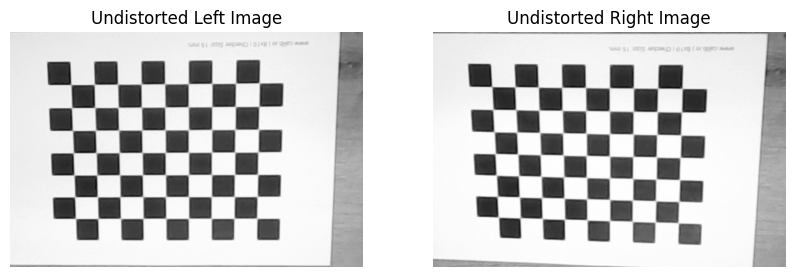

In [9]:
# Loading left and right images
left_img = cv2.imread("cal/1.jpg")
right_img = cv2.imread("cal/2.jpg")

# Convert to grayscale
left_gray = cv2.cvtColor(left_img, cv2.COLOR_BGR2GRAY)
right_gray = cv2.cvtColor(right_img, cv2.COLOR_BGR2GRAY)

# Undistort images
undistorted_left = cv2.undistort(left_gray, K, dist) # Removes distortion from an image using a precomputed camera matrix (K) and distortion coefficients.Corrects radial and tangential distortions caused by the camera lens, ensuring straight lines remain straight.
undistorted_right = cv2.undistort(right_gray, K, dist)

# Display the undistorted images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(undistorted_left, cmap="gray")
plt.title("Undistorted Left Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(undistorted_right, cmap="gray")
plt.title("Undistorted Right Image")
plt.axis("off")

plt.show()
